<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Load the Life expectancy dataset and display the first five records 

In [3]:
# load the csv file

df=pd.read_csv("C:/Users/sai/Desktop/New folder (10)/Day 3/Life_Expectancy.csv",index_col=0)

# display the first five observations

df.head()

,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


#### Check the shape of the data and display its information

In [7]:
# check the size of the dataframe

df.shape

(182, 19)

In [8]:
# display dataset information understand the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, Afghanistan to Zimbabwe
Data columns (total 19 columns):
Year                 182 non-null int64
Status               182 non-null object
Adult_Mortality      173 non-null float64
Infant_Deaths        182 non-null int64
Alcohol              15 non-null float64
Hepatitis B          173 non-null float64
Measles              182 non-null int64
BMI                  178 non-null float64
Underfive_Deaths     182 non-null int64
Polio                182 non-null int64
Diphtheria           182 non-null int64
HIV                  182 non-null float64
GDP                  157 non-null float64
Population           141 non-null float64
Malnourished10_19    178 non-null float64
Malnourished5_9      178 non-null float64
Income_Index         169 non-null float64
Schooling            173 non-null float64
Life_Expectancy      173 non-null float64
dtypes: float64(12), int64(6), object(1)
memory usage: 28.4+ KB


In [9]:
# From above information, we can say that there are few null values in the dataset.

# Also, in the datset, only categorical column is Status and remaining all are continuous or dummy_varaible columns.

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
df['Life_Expectancy'].values

array([65. , 77.8, 75.6, 52.4, 76.4, 76.3, 74.8, 82.8, 81.5, 72.7, 76.1,
       76.9, 71.8, 75.5, 72.3, 81.1, 71. , 60. , 69.8, 77. , 77.4, 65.7,
       75. , 77.7, 74.5, 59.9, 59.6, 73.3, 68.7, 57.3, 82.2, 52.5, 53.1,
       85. , 76.1, 74.8, 63.5, 64.7, 79.6, 78. , 79.1, 85. , 78.8, 76. ,
       86. , 63.5,  nan, 73.9, 76.2, 79. , 73.5, 58.2, 64.7, 77.6, 64.8,
       69.9, 81.1, 82.4, 66. , 61.1, 74.4, 81. , 62.4, 81. , 73.6, 71.9,
       59. , 66.2, 63.5, 74.6, 75.8, 82.7, 68.3, 69.1, 75.5, 68.9, 81.4,
       82.5, 82.7, 76.2, 83.7, 74.1, 72. , 63.4, 66.3, 74.7, 71.1, 74.6,
       74.9, 53.7, 61.4, 72.7, 73.6, 82. , 65.5, 58.3, 75. , 78.5, 58.2,
       81.7,  nan, 63.1, 74.6, 76.7,  nan, 68.8, 76.1, 73.9, 57.6, 66.6,
       65.8,  nan, 69.2, 81.9, 81.6, 74.8, 61.8, 54.5,  nan, 81.8, 76.6,
       66.4,  nan, 77.8, 74. , 75.5, 68.5, 77.5, 81.1, 78.2, 82.3, 72.1,
       75. , 75. , 66.1,  nan, 75.2, 74. ,  nan, 74.5, 66.7, 75.6, 73.2,
       51. , 83.1, 76.7, 88. , 69.2, 55. , 62.9, 57

In [11]:
df['Life_Expectancy'].isna().sum()

9

In [12]:
df['Life_Expectancy'].fillna(method='ffill',inplace=True)

df['Life_Expectancy'].isna().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
df.isna().sum()

Year                   0
Status                 0
Adult_Mortality        9
Infant_Deaths          0
Alcohol              167
Hepatitis B            9
Measles                0
BMI                    4
Underfive_Deaths       0
Polio                  0
Diphtheria             0
HIV                    0
GDP                   25
Population            41
Malnourished10_19      4
Malnourished5_9        4
Income_Index          13
Schooling              9
Life_Expectancy        0
dtype: int64

In [14]:
df.drop('Alcohol',axis=1,inplace=True)

df.fillna(method='ffill',inplace=True)

In [15]:
df.isna().sum()

Year                 0
Status               0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
df.var()

Year                 2.088519e-01
Adult_Mortality      9.117217e+03
Infant_Deaths        6.772822e+03
Hepatitis B          6.238208e+02
Measles              6.177849e+07
BMI                  4.536281e+02
Underfive_Deaths     1.121574e+04
Polio                6.236836e+02
Diphtheria           5.270706e+02
HIV                  1.776435e+00
GDP                  1.723885e+08
Population           1.170802e+15
Malnourished10_19    1.751391e+01
Malnourished5_9      1.821535e+01
Income_Index         2.291773e-02
Schooling            9.956479e+00
Life_Expectancy      6.479353e+01
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
Year                 182 non-null int64
Status               182 non-null object
Adult_Mortality      182 non-null float64
Infant_Deaths        182 non-null int64
Hepatitis B          182 non-null float64
Measles              182 non-null int64
BMI                  182 non-null float64
Underfive_Deaths     182 non-null int64
Polio                182 non-null int64
Diphtheria           182 non-null int64
HIV                  182 non-null float64
GDP                  182 non-null float64
Population           182 non-null float64
Malnourished10_19    182 non-null float64
Malnourished5_9      182 non-null float64
Income_Index         182 non-null float64
Schooling            182 non-null float64
Life_Expectancy      182 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 27.0+ KB


In [18]:
# Status is the only categorcial column(dtype=object). So do dummy encoding for status column alone.

In [19]:
df=pd.get_dummies(df,columns=['Status'],drop_first=True)
df.head()

,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_Developing
Country,,,,,,,,,,,,,,,,,,
Afghanistan,2015,263.0,62,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,1
Albania,2015,74.0,0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8,1
Algeria,2015,19.0,21,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6,1
Angola,2015,335.0,66,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4,1
Antigua,2015,13.0,0,99.0,0,47.7,0,86,99,0.2,13566.954100,2785935.0,3.3,3.3,0.784,13.9,76.4,1


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
y=df['Life_Expectancy']
x=df.drop('Life_Expectancy',axis=1)

import statsmodels.api as sm
Xc=sm.add_constant(x)
model = sm.OLS(y,Xc).fit()

y_pred = model.predict(Xc)
residuals = model.resid

C:\Users\narendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


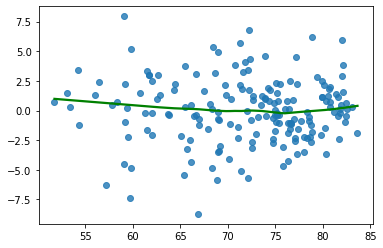

In [21]:
sns.regplot(y_pred, residuals, lowess=True, line_kws={'color':'g'})
plt.show()

In [22]:
from statsmodels.stats.api import het_goldfeldquandt

het_goldfeldquandt(y=residuals,x=Xc)

(1.317453572542622, 0.12061394477654172, 'increasing')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# OLS approach is the least squares regression method.

y=df['Life_Expectancy']
x=df[['Hepatitis B','Polio','Diphtheria ']]

Xc=sm.add_constant(x)
results = sm.OLS(y,Xc).fit()

y_pred = results.predict(Xc)

# Unexplaineed variation means sum of squares of error(SSE)
SSE = np.sum((y-y_pred)**2)
print("Unexplained variation for the model is:",SSE)

Unexplained variation for the model is: 8153.255126851351


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# OLS approach is the least squares regression method.

y=df['Life_Expectancy']
x=df[['Malnourished10_19', 'Malnourished5_9']]

Xc=sm.add_constant(x)
results = sm.OLS(y,Xc).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     21.89
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           3.13e-09
Time:                        09:40:32   Log-Likelihood:                -617.42
No. Observations:                 182   AIC:                             1241.
Df Residuals:                     179   BIC:                             1250.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                75.5685      0.782     96.685      0.000      74.026      77.111
Malnourished10_19    -0.3073      0.572     -0.537      0.592      -1.437       0.822
Malnourished5_9      -0.5397      0.561     -0.961      0.338      -1.647       0.568
==============================================================================
Omnibus:                        8.608   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.106
Skew:                          -0.540   Prob(JB):                       0.0105
Kurtosis:                       2.814   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# OLS(Least squares ression) Approch

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

y=df['Life_Expectancy']
x=df[['Adult_Mortality']]

Xc=sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(Xc,y,train_size=0.7,random_state=4)

model = sm.OLS(ytrain,xtrain).fit()

ypredtest_ols = model.predict(xtest)
ypredtrain_ols = model.predict(xtrain)

r2_ols_test = r2_score(ytest,ypredtest_ols)
r2_ols_train  = r2_score(ytrain,ypredtrain_ols)

rmse_ols_test = np.sqrt(mean_squared_error(ytest,ypredtest_ols))
rmse_ols_train = np.sqrt(mean_squared_error(ytrain,ypredtrain_ols))


C:\Users\narendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
# Gradient Descent Approach

from sklearn.linear_model import LinearRegression

y=df['Life_Expectancy']
x=df[['Adult_Mortality']]

Xc=sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(Xc,y,train_size=0.7,random_state=4)

lr= LinearRegression()

lr.fit(xtrain,ytrain)

ypredtest_lr = lr.predict(xtest)
ypredtrain_lr = lr.predict(xtrain)

r2_lr_test = r2_score(ytest,ypredtest_ols)
r2_lr_train  = r2_score(ytrain,ypredtrain_ols)

rmse_lr_test = np.sqrt(mean_squared_error(ytest,ypredtest_lr))
rmse_lr_train = np.sqrt(mean_squared_error(ytrain,ypredtrain_lr))


C:\Users\narendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
print('OLS: ')
print('R2 for train data : ',r2_ols_train)
print('R2 for test data  : ',r2_ols_test)
print('\n')
print('Linear Regression (Gradient Descent): ')
print('R2 for train data : ',r2_lr_train)
print('R2 for test data  : ',r2_lr_test)
print('\n')
print('OLS :')
print('RmSE for train data : ',rmse_ols_train)
print('RMSE for test data  : ',rmse_ols_test)
print('\n')
print('Linear Regression (Gradient Descent) :')
print('RMSE for train data : ',rmse_lr_train)
print('RMSE for test data  : ',rmse_lr_test)

OLS: 
R2 for train data :  0.6105901482595533
R2 for test data  :  0.6205415252091142


Linear Regression (Gradient Descent): 
R2 for train data :  0.6105901482595533
R2 for test data  :  0.6205415252091142


OLS :
RmSE for train data :  5.074551511982911
RMSE for test data  :  4.7827636492912005


Linear Regression (Gradient Descent) :
RMSE for train data :  5.074551511982911
RMSE for test data  :  4.782763649291203


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# Stochastic Gradient Descent(SGD)





# OLS(Least Squares Regression) Approach

y=df['Life_Expectancy']
x=df[['Hepatitis B','Polio','Diphtheria ']]

Xc=sm.add_constant(x)
results = sm.OLS(y,Xc).fit()

results.summary()

C:\Users\narendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     26.01
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           5.31e-14
Time:                        09:40:40   Log-Likelihood:                -604.24
No. Observations:                 182   AIC:                             1216.
Df Residuals:                     178   BIC:                             1229.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.3213      1.996     27.710      0.000      51.382      59.261
Hepatitis B    -0.0822      0.046     -1.796      0.074      -0.173       0.008
Polio           0.1027      0.028      3.734      0.000       0.048       0.157
Diphtheria      0.1748      0.054      3.230      0.001       0.068       0.282
==============================================================================
Omnibus:                        8.403   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.831
Skew:                          -0.536   Prob(JB):                       0.0121
Kurtosis:                       2.880   Cond. No.                         593.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# OLS(Least squares ression) Approch

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

y=df['Life_Expectancy']
x=df[['Adult_Mortality']]

Xc=sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(Xc,y,train_size=0.7,random_state=4)

model = sm.OLS(ytrain,xtrain).fit()

ypredtest_ols = model.predict(xtest)
ypredtrain_ols = model.predict(xtrain)

r2_ols_test = r2_score(ytest,ypredtest_ols)
r2_ols_train  = r2_score(ytrain,ypredtrain_ols)

rmse_ols_test = np.sqrt(mean_squared_error(ytest,ypredtest_ols))
rmse_ols_train = np.sqrt(mean_squared_error(ytrain,ypredtrain_ols))

print('R2 for train data : ',r2_ols_train)
print('R2 for test data  : ',r2_ols_test)
print('\n')
print('RMSE for train data : ',rmse_ols_train)
print('RMSE for test data  : ',rmse_ols_test)

R2 for train data :  0.6105901482595533
R2 for test data  :  0.6205415252091142


RMSE for train data :  5.074551511982911
RMSE for test data  :  4.7827636492912005


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
y=df['Life_Expectancy']
x=df.drop(columns='Life_Expectancy')

Xc= sm.add_constant(x)

model = sm.OLS(y,Xc).fit()
model.summary()

C:\Users\narendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     75.41
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           2.92e-68
Time:                        09:40:41   Log-Likelihood:                -439.24
No. Observations:                 182   AIC:                             914.5
Df Residuals:                     164   BIC:                             972.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3114.9343   1093.236     -2.849      0.005   -5273.566    -956.302
Year                  1.5722      0.543      2.898      0.004       0.501       2.643
Adult_Mortality      -0.0238      0.003     -6.889      0.000      -0.031      -0.017
Infant_Deaths         0.0718      0.032      2.226      0.027       0.008       0.135
Hepatitis B           0.0250      0.021      1.187      0.237      -0.017       0.067
Measles           -5.521e-05   5.55e-05     -0.995      0.321      -0.000    5.43e-05
BMI                  -0.0147      0.013     -1.107      0.270      -0.041       0.012
Underfive_Deaths     -0.0520      0.023     -2.249      0.026      -0.098      -0.006
Polio                 0.0072      0.012      0.582      0.561      -0.017       0.032
Diphtheria            0.0072      0.025      0.292      0.771      -0.041       0.056
HIV                  -0.4499      0.220     -2.044      0.043      -0.885      -0.015
GDP               -2.125e-05   1.85e-05     -1.147      0.253   -5.78e-05    1.53e-05
Population        -4.378e-09   6.82e-09     -0.642      0.522   -1.78e-08    9.08e-09
Malnourished10_19    -0.0907      0.239     -0.380      0.705      -0.562       0.381
Malnourished5_9      -0.0565      0.236     -0.239      0.811      -0.523       0.410
Income_Index         34.4265      3.514      9.796      0.000      27.487      41.366
Schooling            -0.1795      0.132     -1.361      0.175      -0.440       0.081
Status_Developing    -0.7507      0.689     -1.089      0.278      -2.112       0.610
==============================================================================
Omnibus:                        2.597   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.500
Skew:                          -0.092   Prob(JB):                        0.287
Kurtosis:                       3.544   Cond. No.                     1.87e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# We go for Ridge regression as we have to keep all the features in the model.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = df['Life_Expectancy']
x = df.drop(columns='Life_Expectancy')

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=4)

ss=StandardScaler()
xs = ss.fit_transform(x)
x_trains = ss.fit_transform(x_train)
x_tests = ss.transform(x_test)

x_trains = pd.DataFrame(x_trains,columns=x.columns)
x_tests = pd.DataFrame(x_tests,columns=x.columns)


In [32]:
# Let's find the best alpha by tuning the alphas.

from sklearn.linear_model import Ridge, RidgeCV

alphas = np.logspace(-3,1,500)
ridge_cv = RidgeCV(alphas=alphas,cv=5)
ridge_cv.fit(xs,y)

ridge_cv.alpha_

C:\Users\narendra\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.22320164692952324

In [33]:
# Let's build the Ridge Regression using the best variable we got,

rd = Ridge(alpha=ridge_cv.alpha_)
rd.fit(x_trains,y_train)

y_pred_train = rd.predict(x_trains)
y_pred_test = rd.predict(x_tests)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('R-square of train set:',r2_train)
print('R-square of test set:',r2_test)

R-square of train set: 0.8887612885336442
R-square of test set: 0.872128531729996


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# To find the significant variables, we go for Lasso regression as it is one of the feature selection technique.

from sklearn.linear_model import Lasso, LassoCV

y  = df['Life_Expectancy']
x  = df[['Hepatitis B','Polio','Diphtheria ','HIV','Measles ']]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=4)

ss=StandardScaler()
xs = ss.fit_transform(x)
x_trains = ss.fit_transform(x_train)
x_tests = ss.transform(x_test)

x_trains = pd.DataFrame(x_trains,columns=x.columns)
x_tests = pd.DataFrame(x_tests,columns=x.columns)

la = Lasso(alpha=1.5)
la.fit(x_trains, y_train)

pd.DataFrame(la.coef_,index=x.columns,columns=['rank'])

,rank
Hepatitis B,0.000000
Polio,1.432667
Diphtheria,0.825970
HIV,-2.253377
Measles,-0.000000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
from sklearn.linear_model import Lasso, LassoCV

y  = df['Life_Expectancy']
x = df[['Measles ','HIV','Malnourished10_19','Malnourished5_9']]

x_train,x_test,y_train,y_test = train_test_split(x,y)

ss=StandardScaler()
xs = ss.fit_transform(x)
x_trains = ss.fit_transform(x_train)
x_tests = ss.transform(x_test)

x_trains = pd.DataFrame(x_trains,columns=x.columns)
x_tests = pd.DataFrame(x_tests,columns=x.columns)

lasso_reg = Lasso(alpha = 1)
lasso_reg.fit(x_trains, y_train)

pd.DataFrame(lasso_reg.coef_,index=x.columns,columns=['rank'])

,rank
Measles,-0.000000
HIV,-3.496946
Malnourished10_19,-0.000000
Malnourished5_9,-1.808678


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

y  = df['Life_Expectancy']
x = df.drop('Life_Expectancy',axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y)

ss=StandardScaler()
xs = ss.fit_transform(x)
x_trains = ss.fit_transform(x_train)
x_tests = ss.transform(x_test)

x_trains = pd.DataFrame(x_trains,columns=x.columns)
x_tests = pd.DataFrame(x_tests,columns=x.columns)

enet = ElasticNet(alpha=0.1,l1_ratio=0.001)
enet.fit(x_trains, y_train)

y_train_pred = enet.predict(x_train)
y_test_pred = enet.predict(x_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))

print('RMSE for train set: ',rmse_train)
print('RMSE for test set: ',rmse_test)

RMSE for train set:  10063243.591019088
RMSE for test set:  15428856.343877738


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# for a model with all features, we should go for Ridge Regression

from sklearn.linear_model import Ridge, RidgeCV

y  = df['Life_Expectancy']
x = df.drop('Life_Expectancy',axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y)

ss=StandardScaler()
xs = ss.fit_transform(x)
x_trains = ss.fit_transform(x_train)
x_tests = ss.transform(x_test)

x_trains = pd.DataFrame(x_trains,columns=x.columns)
x_tests = pd.DataFrame(x_tests,columns=x.columns)

rd = Ridge(alpha=0.5)
rd.fit(x_trains, y_train)

a=pd.DataFrame(rd.coef_,index=x.columns,columns=['coefficients'])

print("The significant variables are:")
a[np.abs(a['coefficients']>0.00000)]


The significant variables are:


,coefficients
Year,0.570744
Infant_Deaths,3.288252
Hepatitis B,0.777051
Polio,0.156470
Diphtheria,0.214354
Income_Index,5.683519


<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
from sklearn.linear_model import Ridge, RidgeCV

y  = df['Life_Expectancy']
x = df.drop('Life_Expectancy',axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle = True, random_state=4)

ss = StandardScaler()
x_trains = ss.fit_transform(x_train)
x_tests = ss.transform(x_test)

x_trains = pd.DataFrame(x_trains,columns=x.columns)
x_tests = pd.DataFrame(x_tests, columns = x.columns)

alphas = [7,8,9,10,11]
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(x_trains,y_train)

print("The best alpha from the given list [7,8,9,10,11] is",ridge_cv.alpha_)

The best alpha from the given list [7,8,9,10,11] is 7


In [49]:
from sklearn.linear_model import Ridge, RidgeCV

y  = df['Life_Expectancy']
x = df.drop(columns = 'Life_Expectancy')

ss = StandardScaler()
xs = ss.fit_transform(x)


alphas = [7,8,9,10,11]
ridge_cv = RidgeCV(alphas=alphas,cv=5)
ridge_cv.fit(xs,y)

print("The best alpha from the given list [7,8,9,10,11] is",ridge_cv.alpha_)

The best alpha from the given list [7,8,9,10,11] is 7


C:\Users\narendra\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
from sklearn.linear_model import Lasso, LassoCV

y  = df['Life_Expectancy']
x = df.drop(columns = 'Life_Expectancy')

ss = StandardScaler()
xs = ss.fit_transform(x)


alphas = [7,8,9,10,11]
lasso_cv = LassoCV(alphas=alphas,cv=5)
lasso_cv.fit(xs,y)

print("The best alpha from the given list [7,8,9,10,11] using lasso regression is",lasso_cv.alpha_)

The best alpha from the given list [7,8,9,10,11] using lasso regression is 7


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

y = df['Life_Expectancy']
x = df[['Measles ','HIV','Malnourished10_19','Malnourished5_9']]



In [40]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# type your code here